<a href="https://colab.research.google.com/github/Mdawood1122/Sales-Data-dashBoard-Python-Base/blob/main/Sales_data_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sales_data.csv generated and saved successfully!

🔹 First 5 Rows of Data:
        Date     Product Region  Sales  Month
0 2025-01-01  Headphones  North   3551      1
1 2025-01-02      Camera   East    504      1
2 2025-01-03      Tablet  North   1376      1
3 2025-01-04      Camera  South   1491      1
4 2025-01-05      Camera  South   4642      1


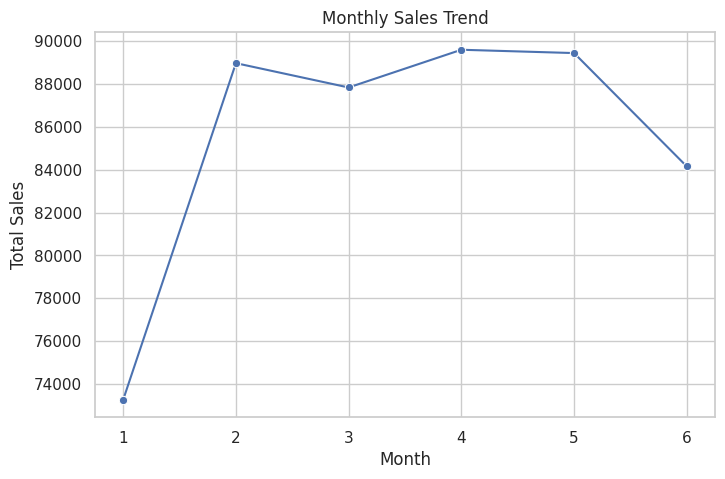

/tmp/ipython-input-2972035294.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette="Blues_d")


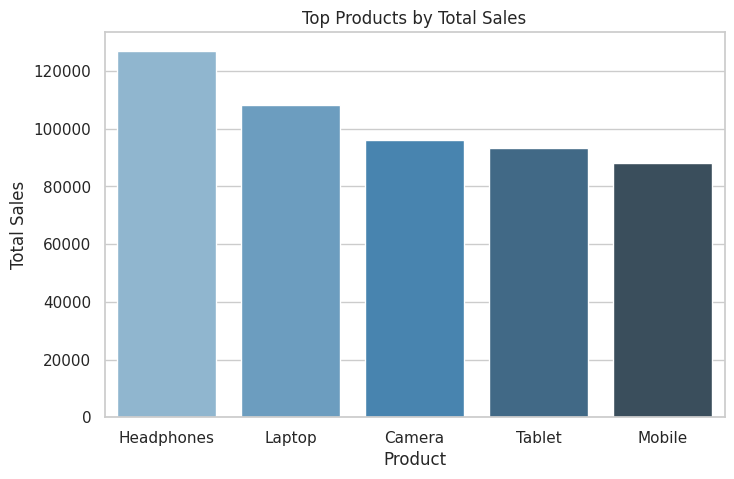

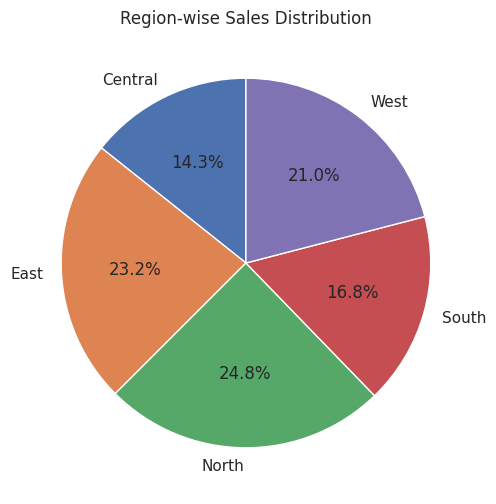


 Sales Summary Report Exported as 'sales_summary.csv'


In [2]:
# ======================
# Libraries Import
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# ======================
# Dataset Generate + Save
# ======================
np.random.seed(42)

data = {
    "Date": pd.date_range(start="2025-01-01", periods=180, freq="D"),
    "Product": np.random.choice(["Laptop", "Mobile", "Tablet", "Headphones", "Camera"], 180),
    "Region": np.random.choice(["North", "South", "East", "West", "Central"], 180),
    "Sales": np.random.randint(500, 5000, size=180)
}

df = pd.DataFrame(data)
df.to_csv("sales_data.csv", index=False)   # file will save in same notbook folder
print("sales_data.csv generated and saved successfully!\n")

# ======================
# Loading Dataset
# ======================
df = pd.read_csv("sales_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month

print("🔹 First 5 Rows of Data:")
print(df.head())

# ======================
# Monthly Sales Trend
# ======================
monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# ======================
# Top Products by Sales
# ======================
product_sales = df.groupby("Product")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=product_sales.index, y=product_sales.values, palette="Blues_d")
plt.title("Top Products by Total Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()

# ======================
# Region-wise Sales Distribution
# ======================
region_sales = df.groupby("Region")["Sales"].sum()

plt.figure(figsize=(6,6))
plt.pie(region_sales.values, labels=region_sales.index, autopct="%1.1f%%", startangle=90)
plt.title("Region-wise Sales Distribution")
plt.show()

# ======================
# Export Summary Report
# ======================
summary = {
    "Total Sales": df["Sales"].sum(),
    "Average Sales": df["Sales"].mean(),
    "Best Product": product_sales.index[0],
    "Top Region": region_sales.index[region_sales.argmax()]
}
summary_df = pd.DataFrame([summary])
summary_df.to_csv("sales_summary.csv", index=False)

print("\n Sales Summary Report Exported as 'sales_summary.csv'")